# Data Analysis and Visualization- COVID-19


**Coronavirus disease 2019 (COVID-19) is an infectious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2)**

### Importing all the required libraries and packages

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/09-26-2020.csv')
apple_mobility = pd.read_csv('https://covid19-static.cdn-apple.com/covid19-mobility-data/2017HotfixDev18/v3/en-us/applemobilitytrends-2020-09-25.csv')



In [3]:
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-09-27 04:23:00,33.93911,67.709953,39192,1453,32635,5104.0,Afghanistan,100.677293,3.707389
1,NaN,NaN,NaN,Albania,2020-09-27 04:23:00,41.15330,20.168300,13153,375,7397,5381.0,Albania,457.050525,2.851061
2,NaN,NaN,NaN,Algeria,2020-09-27 04:23:00,28.03390,1.659600,50914,1711,35756,13447.0,Algeria,116.106702,3.360569
3,NaN,NaN,NaN,Andorra,2020-09-27 04:23:00,42.50630,1.521800,1836,53,1263,520.0,Andorra,2376.237624,2.886710
4,NaN,NaN,NaN,Angola,2020-09-27 04:23:00,-11.20270,17.873900,4672,171,1639,2862.0,Angola,14.215183,3.660103


In [4]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,39170,39186,39192,39227,39233,39254,39268,39285,39290,39297
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,12921,13045,13153,13259,13391,13518,13649,13806,13965,14117
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,50579,50754,50914,51067,51213,51368,51530,51690,51847,51995
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1753,1836,1836,1836,1966,1966,2050,2050,2110,2110
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,4475,4590,4672,4718,4797,4905,4972,5114,5211,5370


### Update the Dates 

In [5]:
cols = confirmed_df.keys()

In [6]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [7]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

### Updating daily and average cases

In [8]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

# window size
window = 7

# confirmed cases
world_daily_increase = daily_increase(world_cases)
world_confirmed_avg= moving_average(world_cases, window)
world_daily_increase_avg = moving_average(world_daily_increase, window)

# deaths
world_daily_death = daily_increase(total_deaths)
world_death_avg = moving_average(total_deaths, window)
world_daily_death_avg = moving_average(world_daily_death, window)


# recoveries
world_daily_recovery = daily_increase(total_recovered)
world_recovery_avg = moving_average(total_recovered, window)
world_daily_recovery_avg = moving_average(world_daily_recovery, window)


# active 
world_active_avg = moving_average(total_active, window)

In [9]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

### Future prediction

In [10]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

### Convert integer into Datetime for better visualization

In [11]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [12]:
# slightly modify the data to fit the model better 
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[50:], world_cases[50:], test_size=0.05, shuffle=False)

### Model for predicting confirmed number of cases

In [13]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

MAE: 3288290.1710053147
MSE: 10994019006500.693


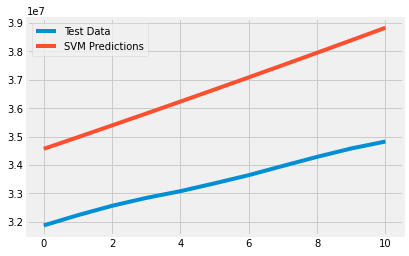

In [14]:
# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [15]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly = PolynomialFeatures(degree=5)
bayesian_poly_X_train_confirmed = bayesian_poly.fit_transform(X_train_confirmed)
bayesian_poly_X_test_confirmed = bayesian_poly.fit_transform(X_test_confirmed)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)

In [16]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 949503.3735777438
MSE: 1012030084810.0753


In [17]:
print(linear_model.coef_)

[[-9.37443868e+05 -6.74656565e+04  2.76844365e+03 -2.88484402e+01
   1.45861707e-01 -2.47576004e-04]]


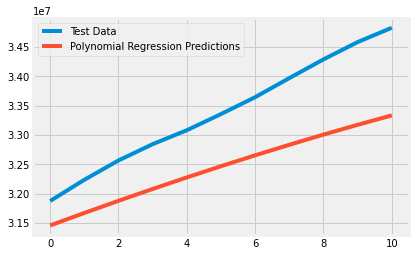

In [18]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [19]:
# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.3s finished


RandomizedSearchCV(cv=3, estimator=BayesianRidge(fit_intercept=False),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'lambda_2': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'normalize': [True, False],
                                        'tol': [1e-06, 1e-05, 0.0001, 0.001,
                                                0.01]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [20]:
bayesian_search.best_params_

{'tol': 0.001,
 'normalize': False,
 'lambda_2': 0.0001,
 'lambda_1': 0.001,
 'alpha_2': 1e-05,
 'alpha_1': 0.0001}

In [21]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

MAE: 309030.0140151615
MSE: 99449581047.22534


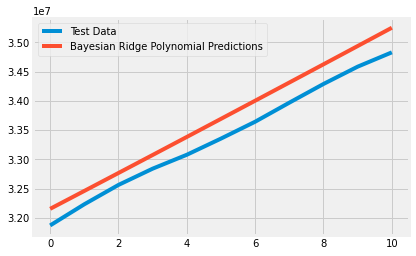

In [22]:
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)
plt.legend(['Test Data', 'Bayesian Ridge Polynomial Predictions'])

## Worldwide Data Visualization of confirmed cases, active cases, deaths, recoveries, mortality rate, and recovery rate

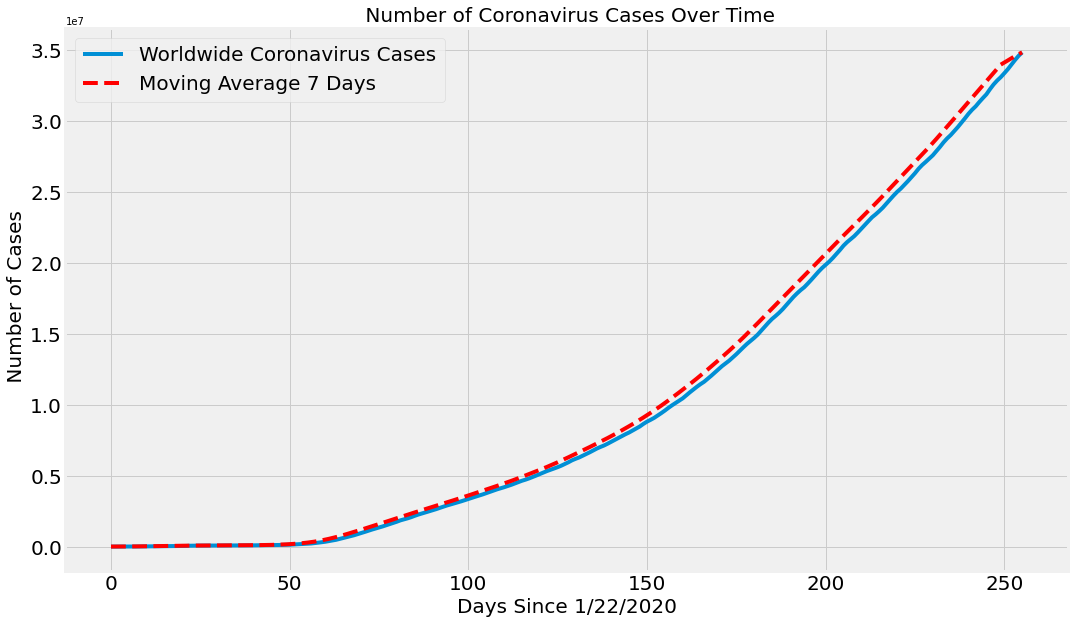

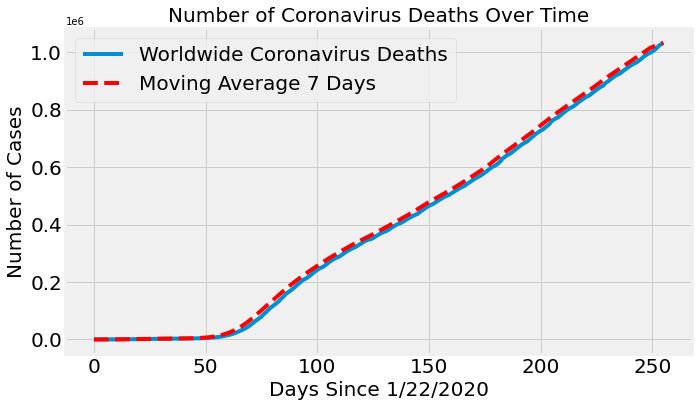

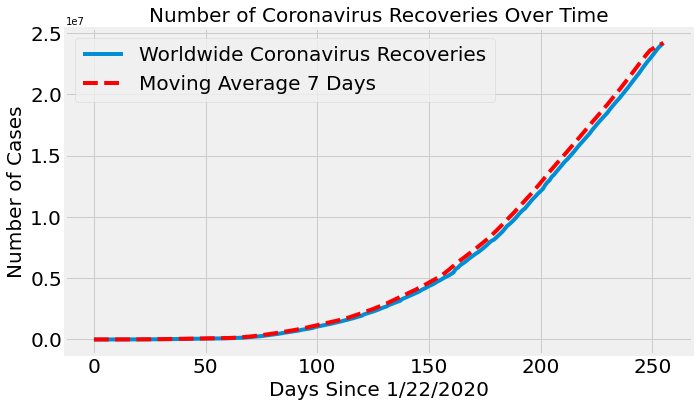

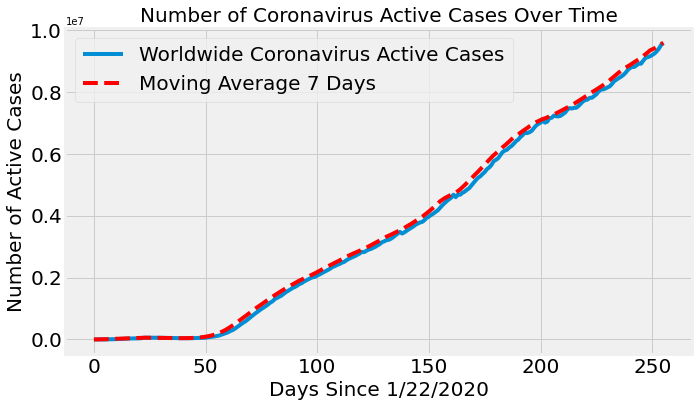

In [23]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, world_cases)
plt.plot(adjusted_dates, world_confirmed_avg, linestyle='dashed', color='red')
plt.title(' Number of Coronavirus Cases Over Time', size=20)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel(' Number of Cases', size=20)
plt.legend(['Worldwide Coronavirus Cases', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(adjusted_dates, total_deaths)
plt.plot(adjusted_dates, world_death_avg, linestyle='dashed', color='red')
plt.title('Number of Coronavirus Deaths Over Time', size=20)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('Number of Cases', size=20)
plt.legend(['Worldwide Coronavirus Deaths', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(adjusted_dates, total_recovered)
plt.plot(adjusted_dates, world_recovery_avg, linestyle='dashed', color='red')
plt.title('Number of Coronavirus Recoveries Over Time', size=20)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('Number of Cases', size=20)
plt.legend(['Worldwide Coronavirus Recoveries', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(adjusted_dates, total_active)
plt.plot(adjusted_dates, world_active_avg, linestyle='dashed', color='red')
plt.title('Number of Coronavirus Active Cases Over Time', size=20)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('Number of Active Cases', size=20)
plt.legend(['Worldwide Coronavirus Active Cases', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

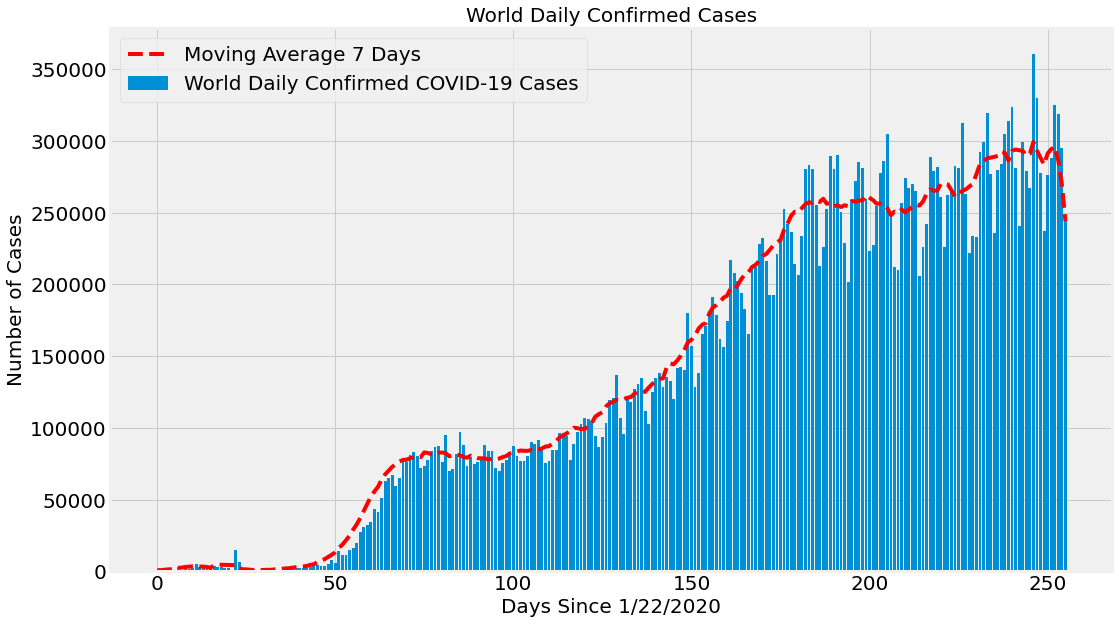

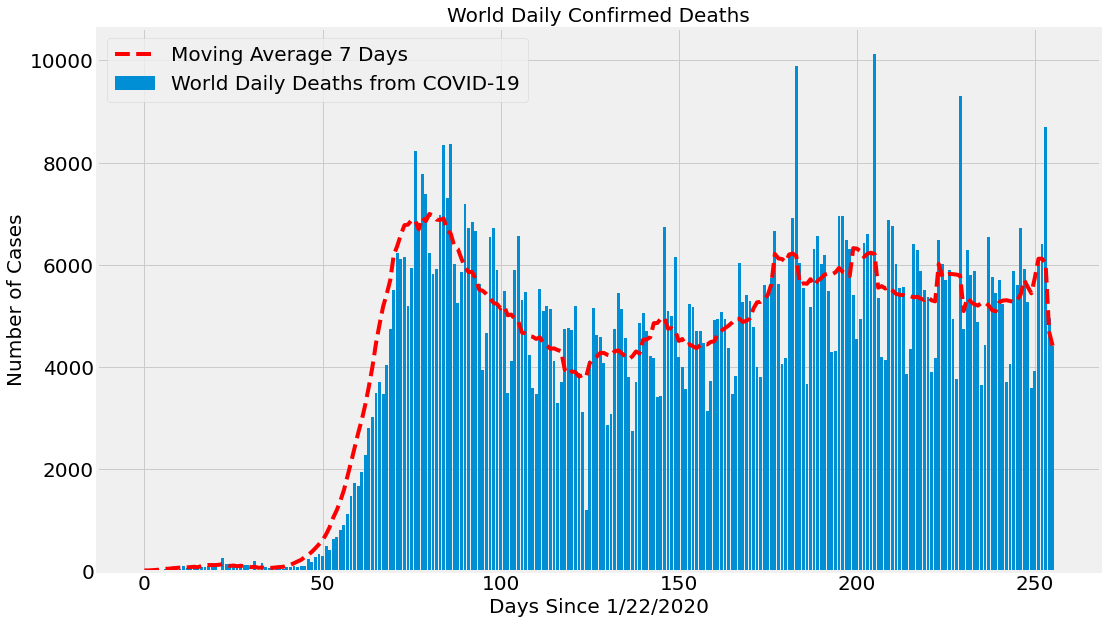

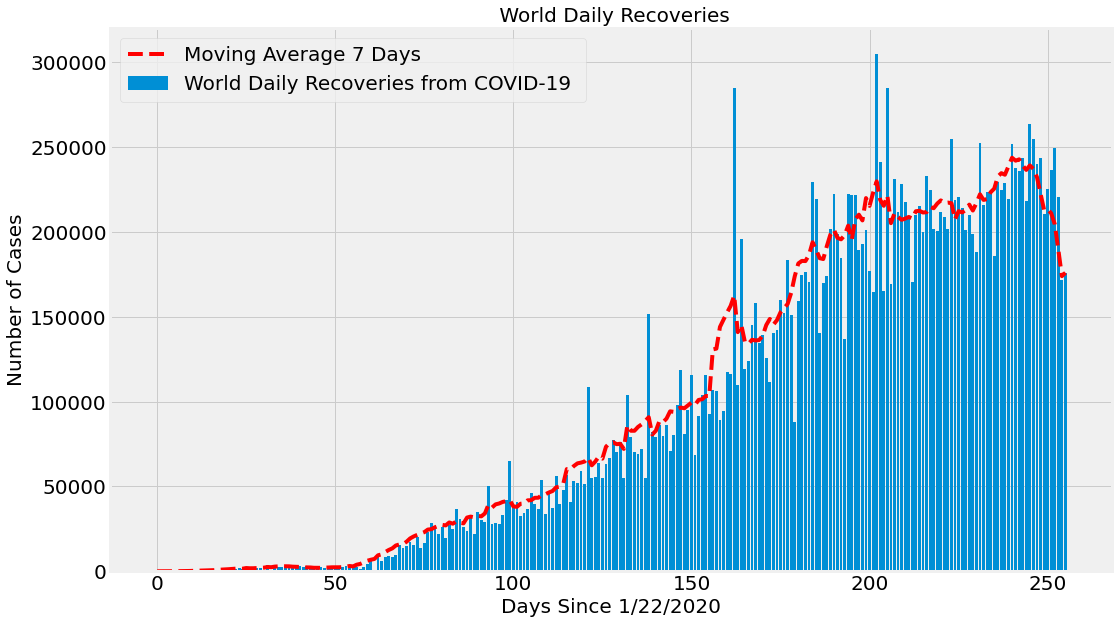

In [24]:
plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, world_daily_increase)
plt.plot(adjusted_dates, world_daily_increase_avg, color='red', linestyle='dashed')
plt.title('World Daily Confirmed Cases', size=20)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('Number of Cases', size=20)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Confirmed COVID-19 Cases'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, world_daily_death)
plt.plot(adjusted_dates, world_daily_death_avg, color='red', linestyle='dashed')
plt.title('World Daily Confirmed Deaths', size=20)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('Number of Cases', size=20)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Deaths from COVID-19'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, world_daily_recovery)
plt.plot(adjusted_dates, world_daily_recovery_avg, color='red', linestyle='dashed')
plt.title(' World Daily Recoveries', size=20)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('Number of Cases', size=20)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Recoveries from COVID-19 '], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

### Data visualization of Country_specific 

In [25]:
def country_plot(x, y1, y2, y3, y4, country):
    # window is set as 14 in in the beginning of the notebook 
    confirmed_avg = moving_average(y1, window)
    confirmed_increase_avg = moving_average(y2, window)
    death_increase_avg = moving_average(y3, window)
    recovery_increase_avg = moving_average(y4, window)
    
    plt.figure(figsize=(16, 10))
    plt.plot(x, y1)
    plt.plot(x, confirmed_avg, color='red', linestyle='dashed')
    plt.legend(['{} Confirmed Cases'.format(country), 'Moving Average {} Days'.format(window)], prop={'size': 20})
    plt.title('{} Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y2)
    plt.plot(x, confirmed_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Cases'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y3)
    plt.plot(x, death_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Deaths'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Deaths'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y4)
    plt.plot(x, recovery_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Recoveries'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Recoveries'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
      
# helper function for getting country's cases, deaths, and recoveries        
def get_country_info(country_name):
    country_cases = []
    country_deaths = []
    country_recoveries = []  
    
    for i in dates:
        country_cases.append(confirmed_df[confirmed_df['Country/Region']==country_name][i].sum())
        country_deaths.append(deaths_df[deaths_df['Country/Region']==country_name][i].sum())
        country_recoveries.append(recoveries_df[recoveries_df['Country/Region']==country_name][i].sum())
    return (country_cases, country_deaths, country_recoveries)
    
    
def country_visualizations(country_name):
    country_info = get_country_info(country_name)
    country_cases = country_info[0]
    country_deaths = country_info[1]
    country_recoveries = country_info[2]
    
    country_daily_increase = daily_increase(country_cases)
    country_daily_death = daily_increase(country_deaths)
    country_daily_recovery = daily_increase(country_recoveries)
    
    country_plot(adjusted_dates, country_cases, country_daily_increase, country_daily_death, country_daily_recovery, country_name)

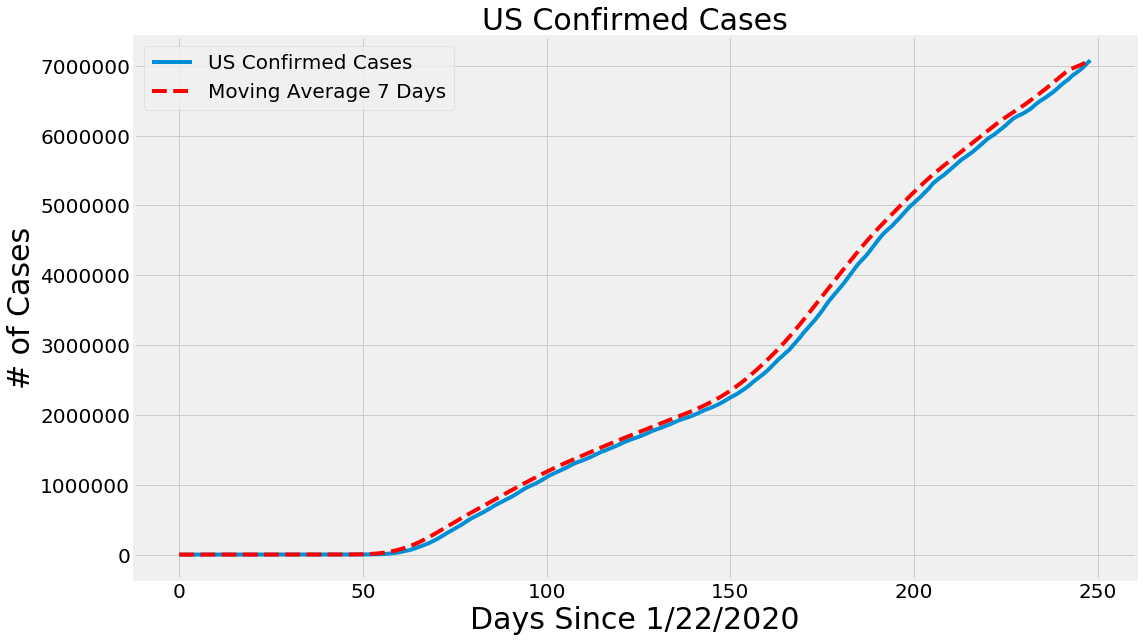

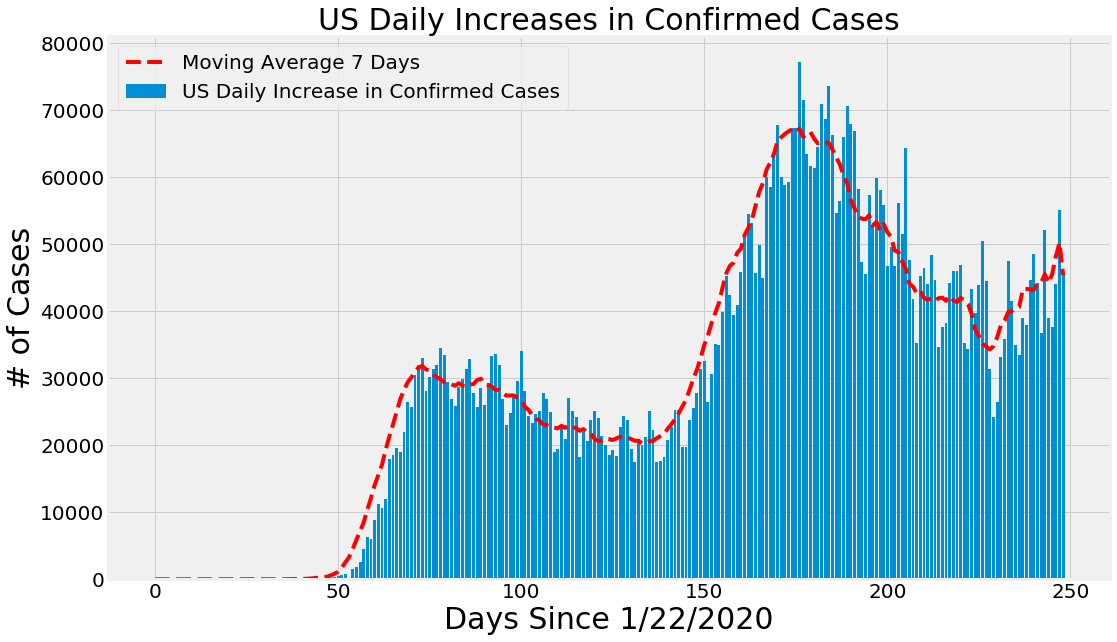

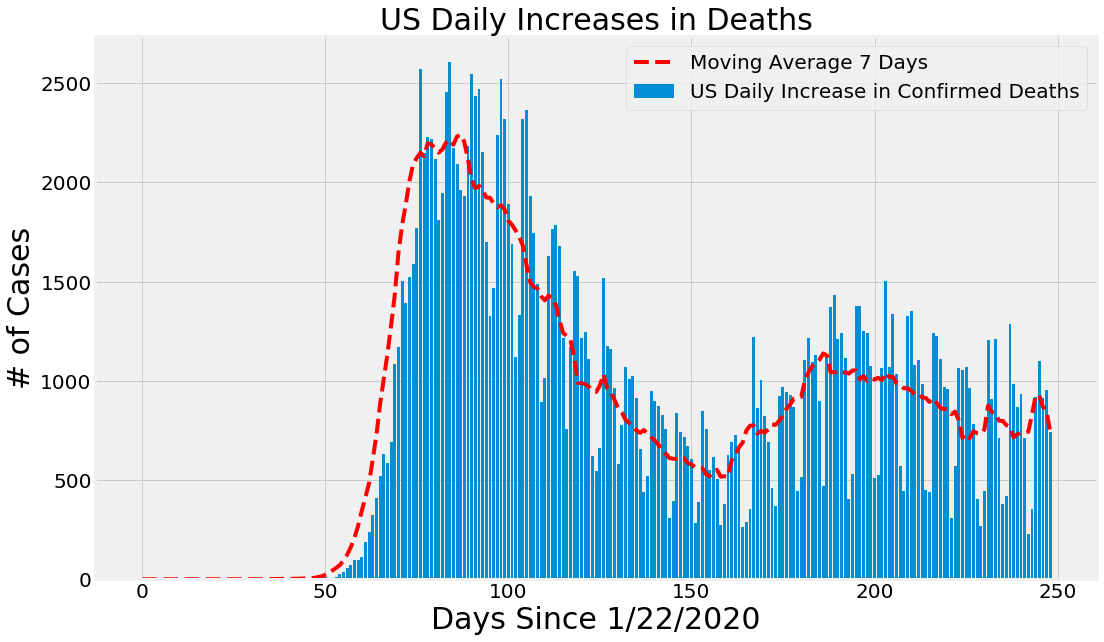

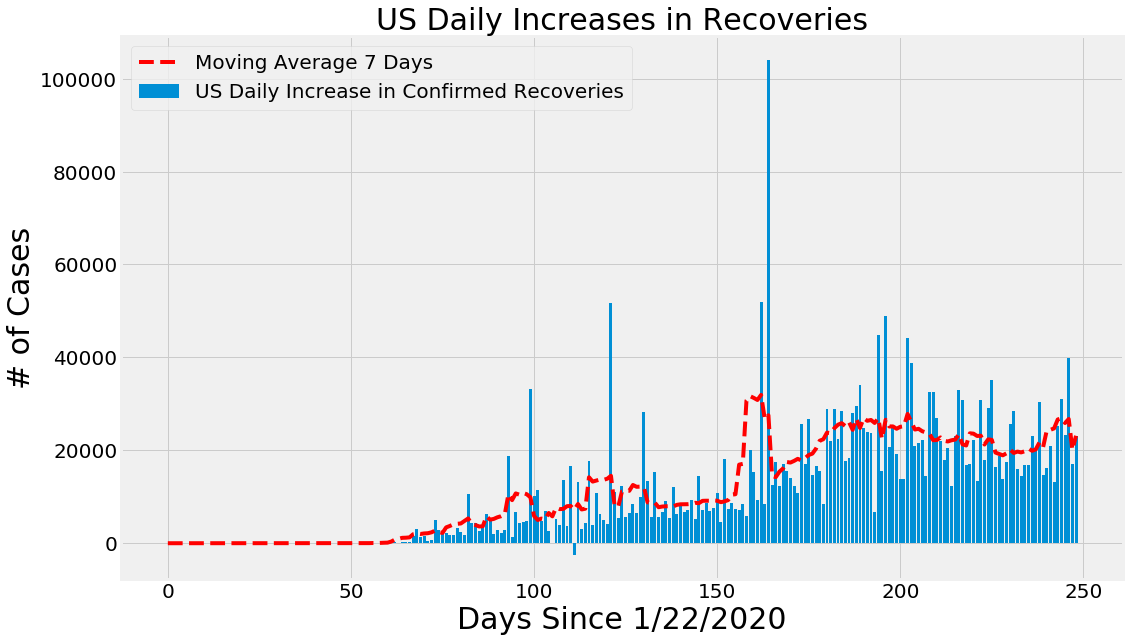

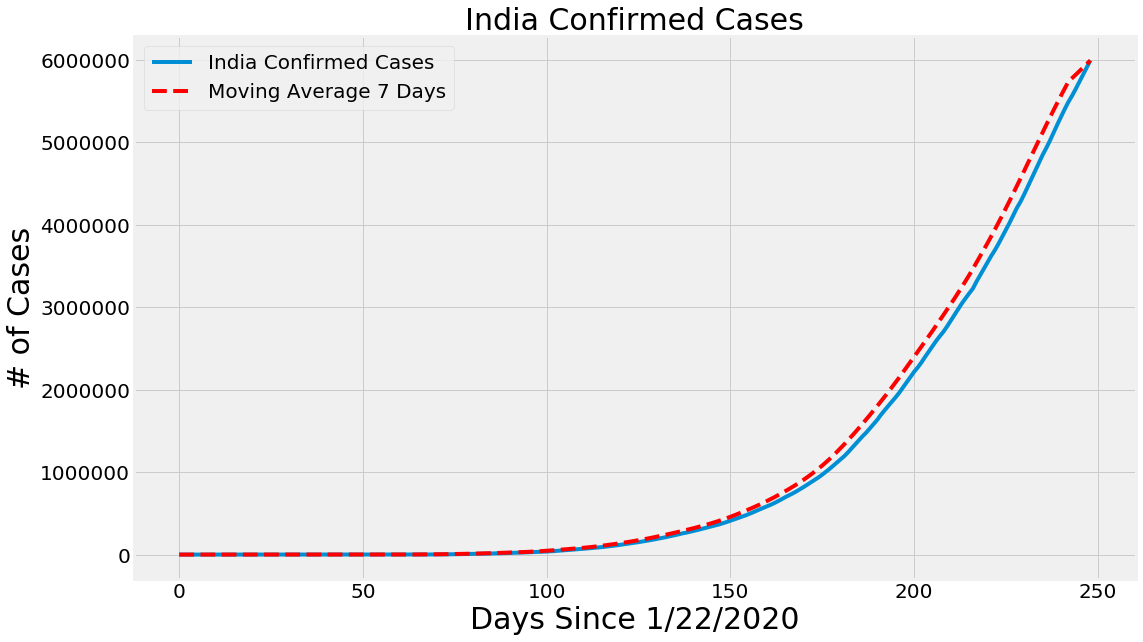

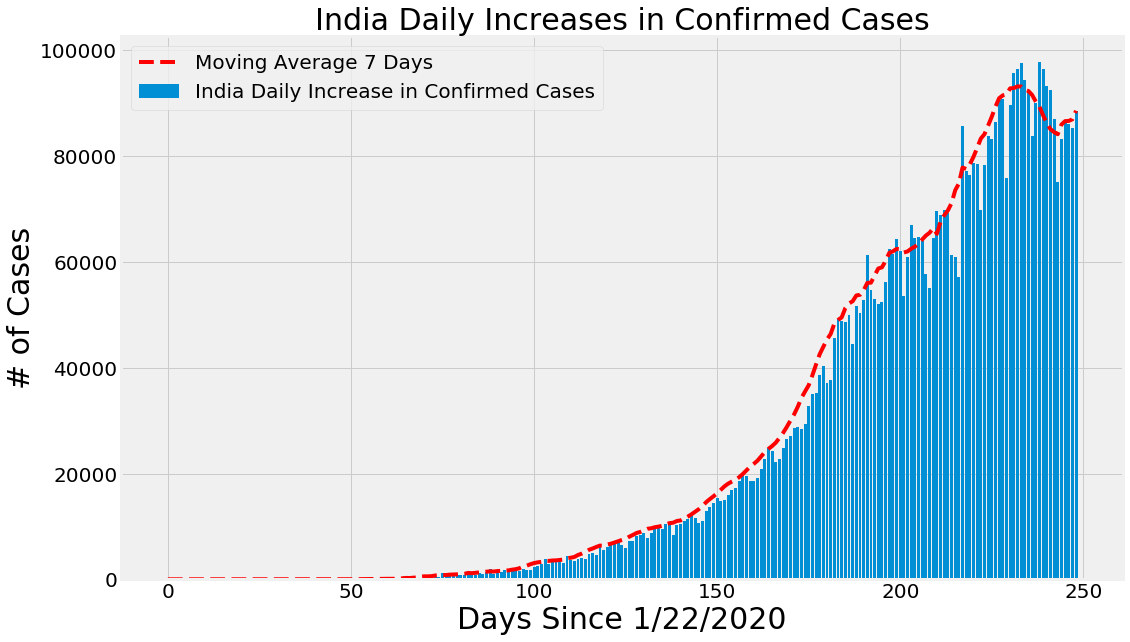

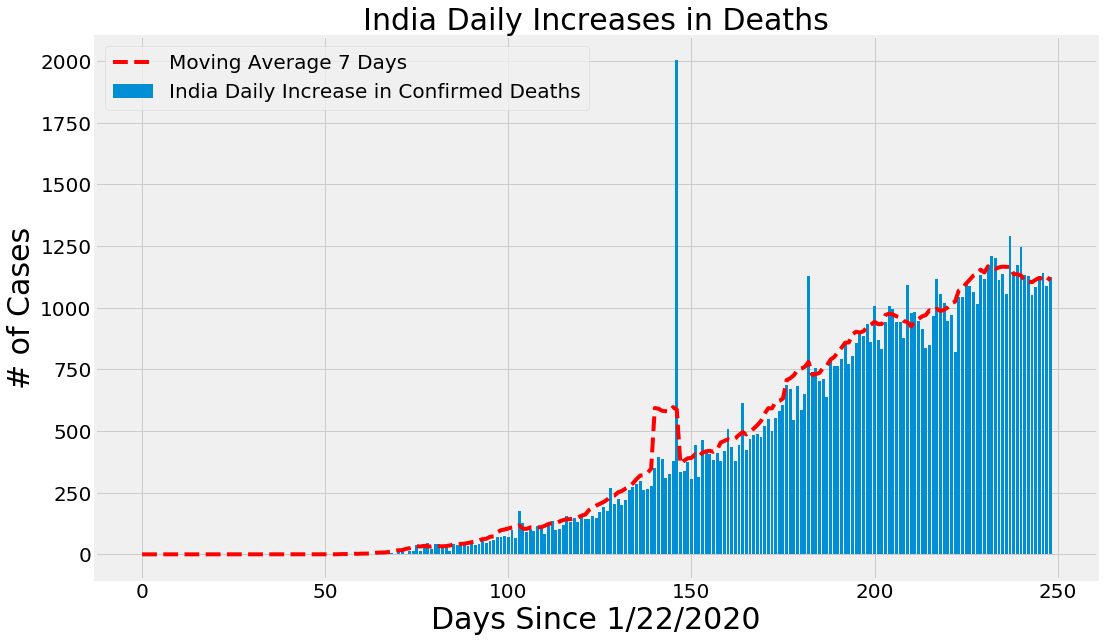

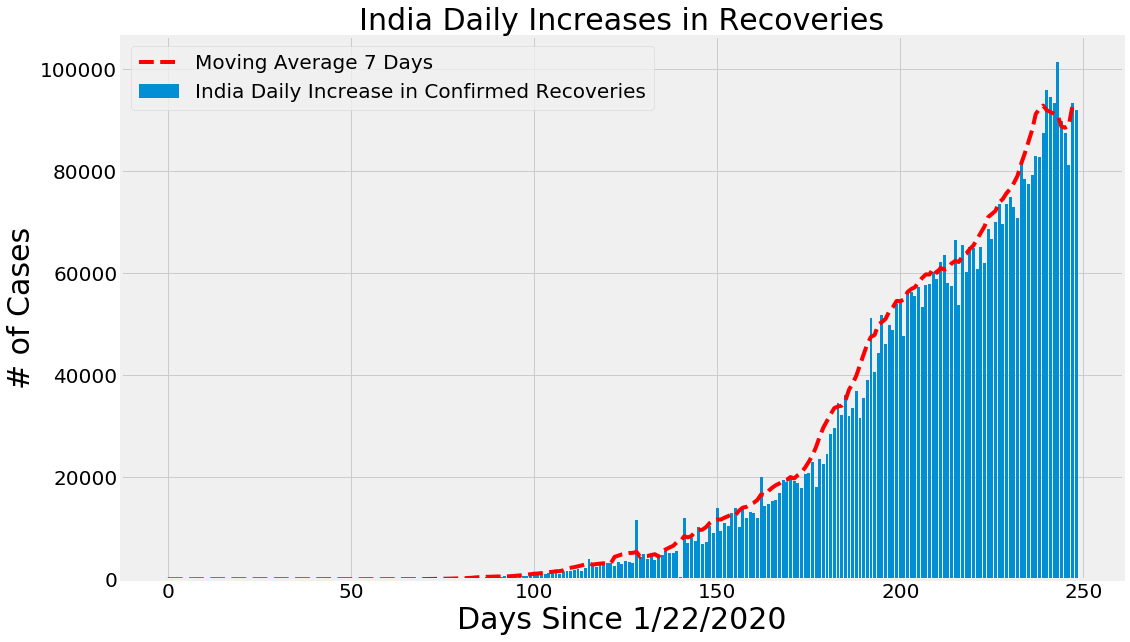

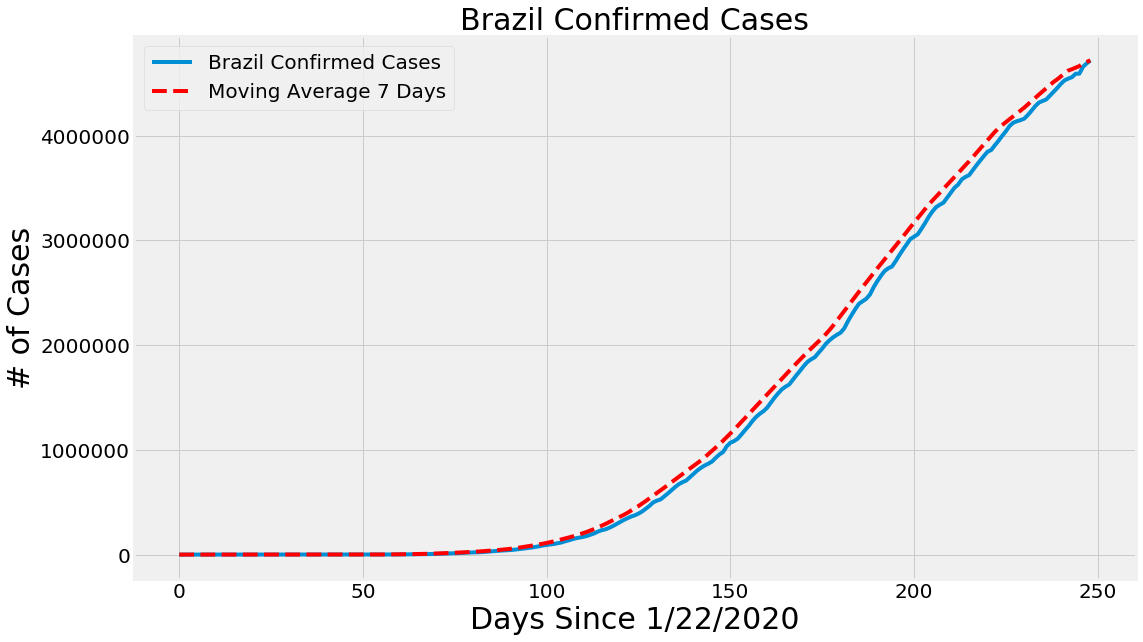

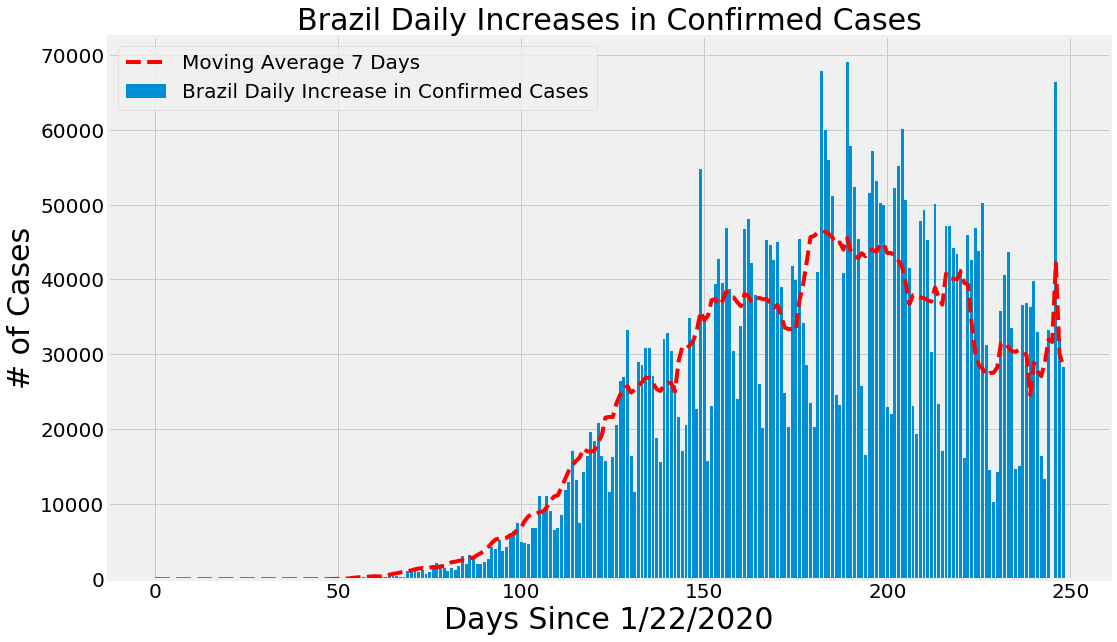

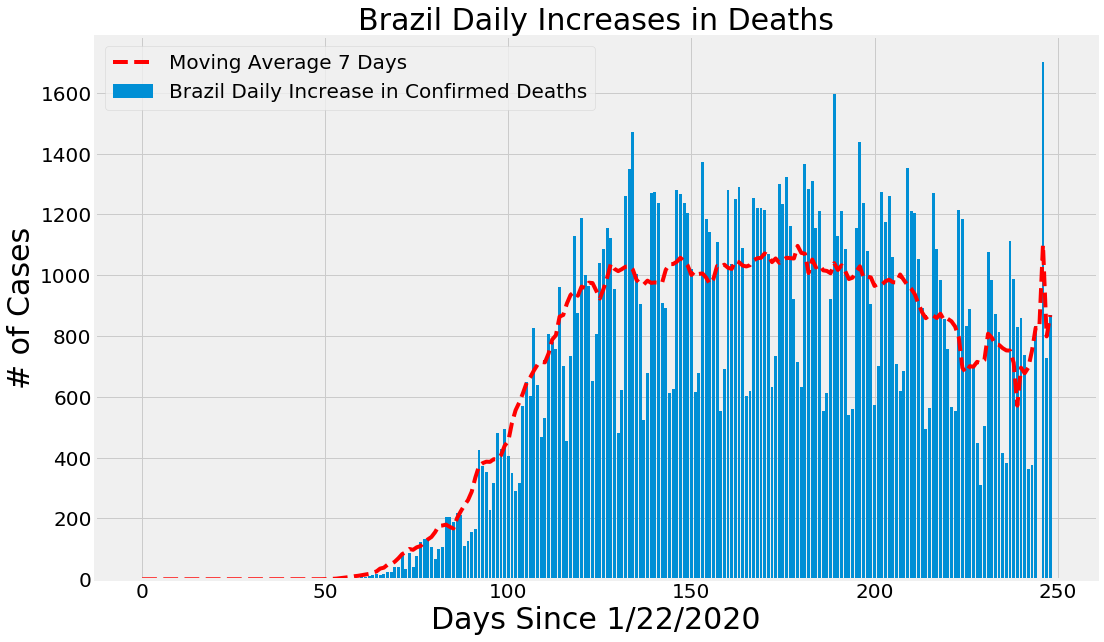

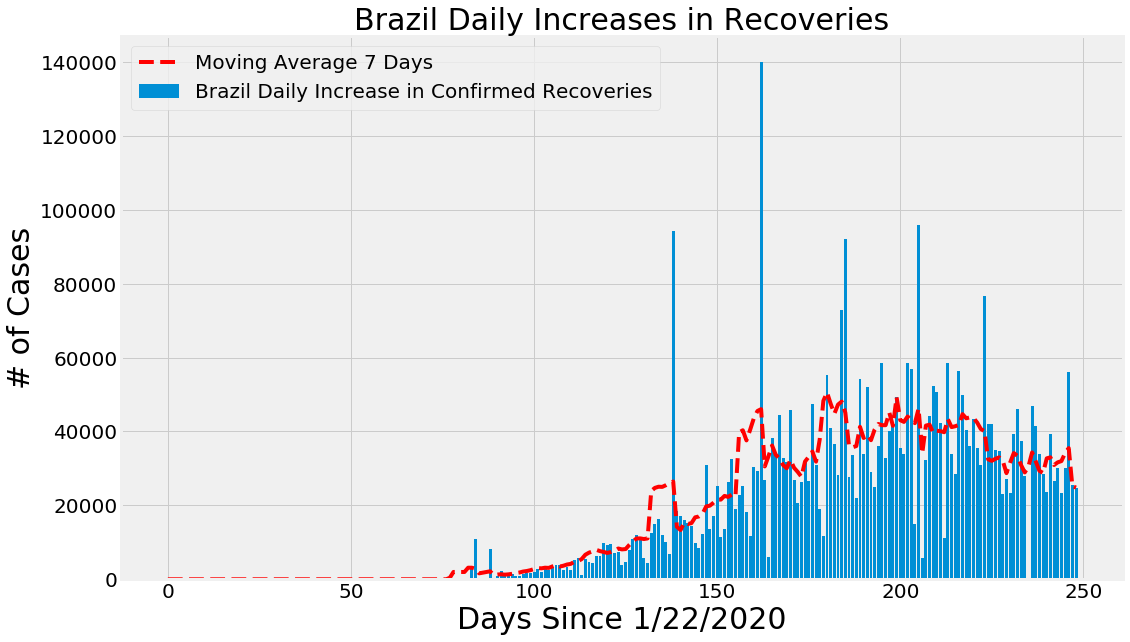

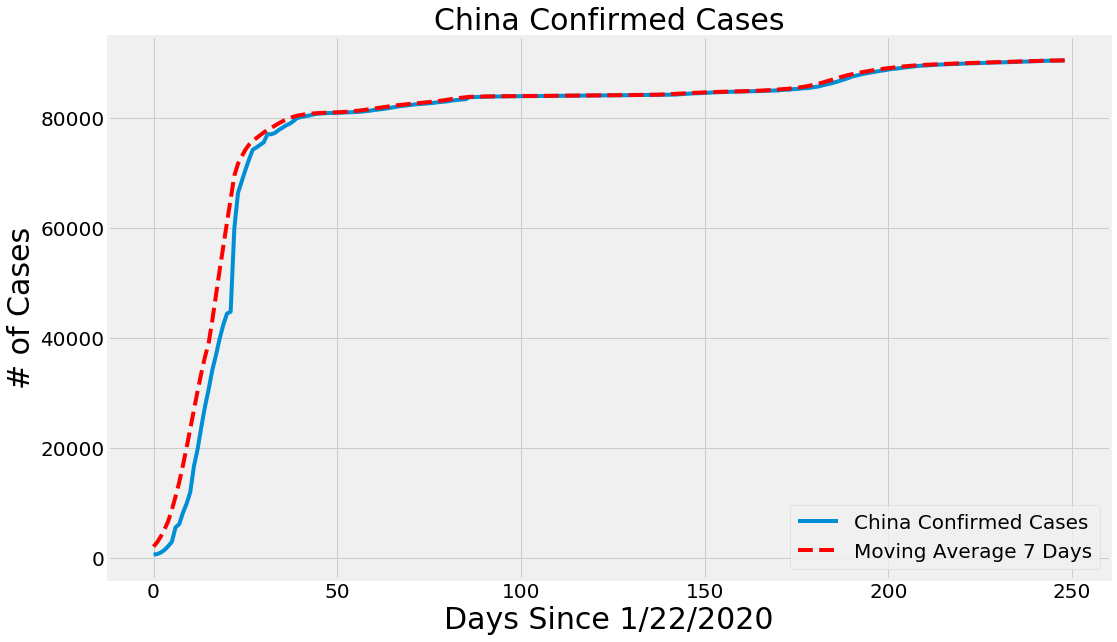

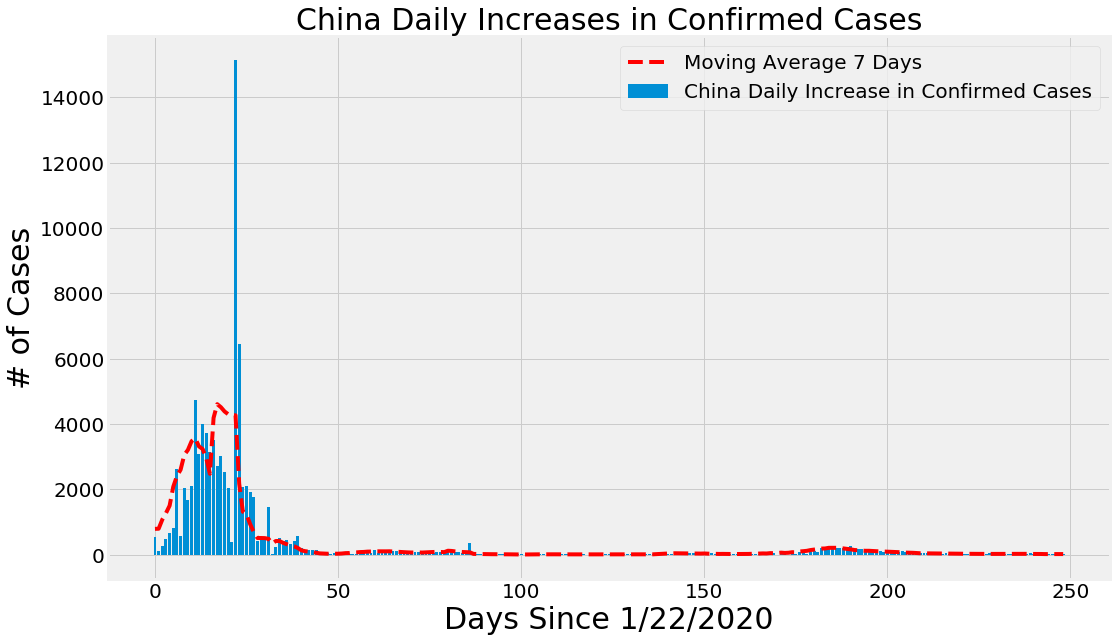

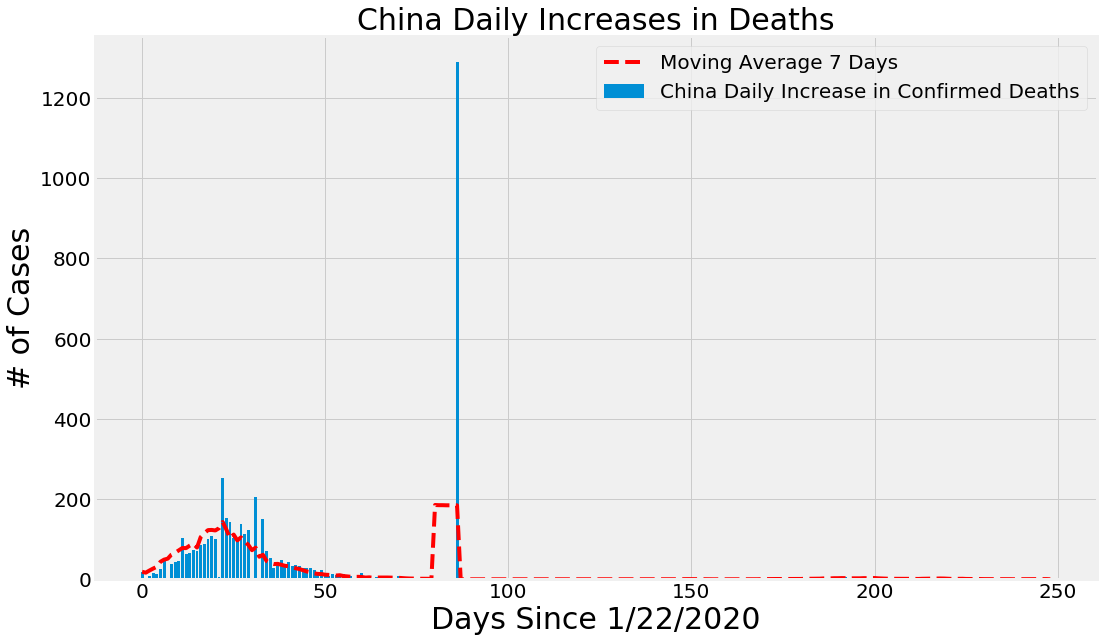

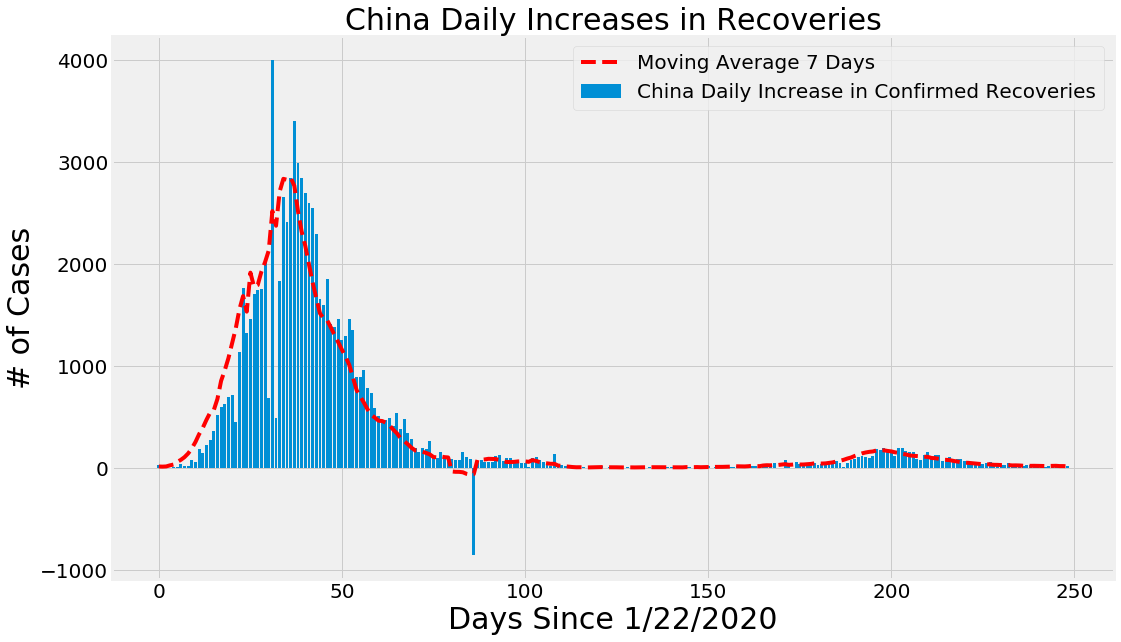

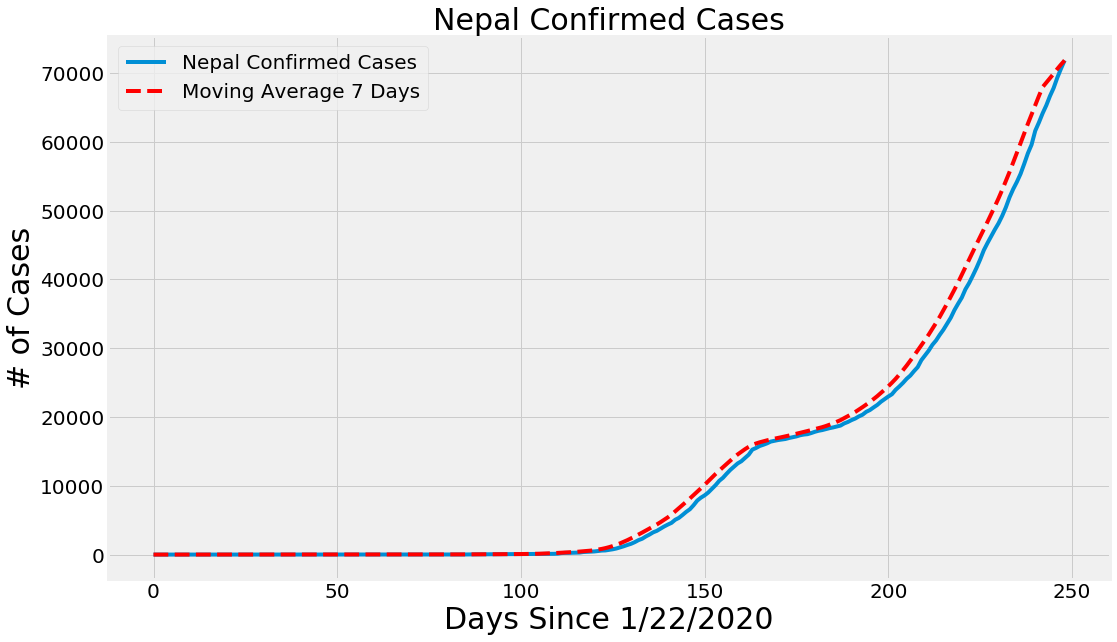

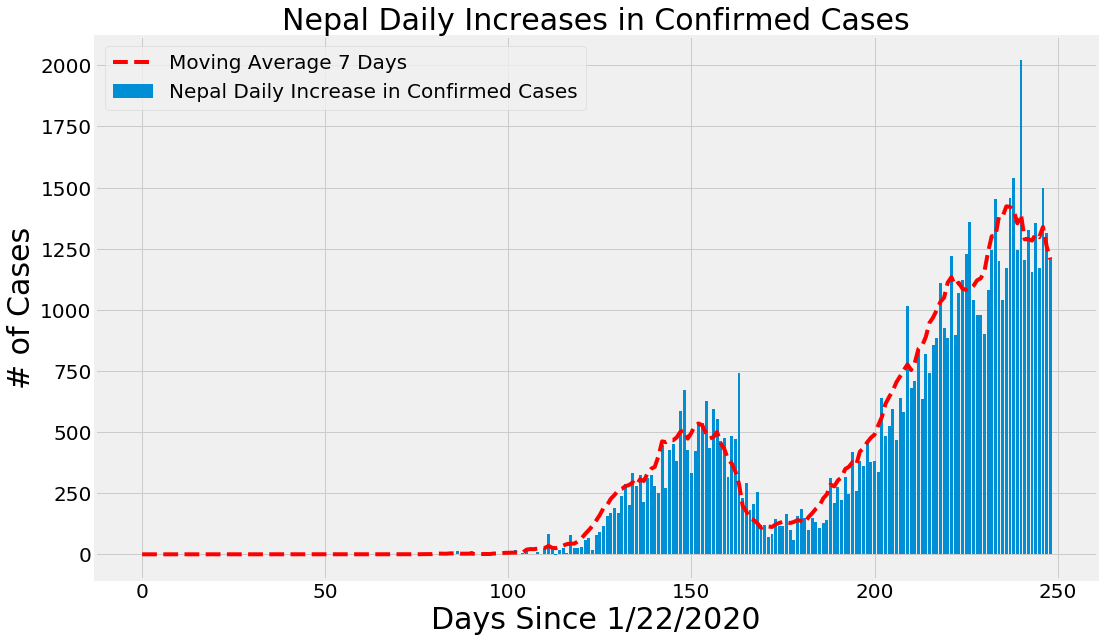

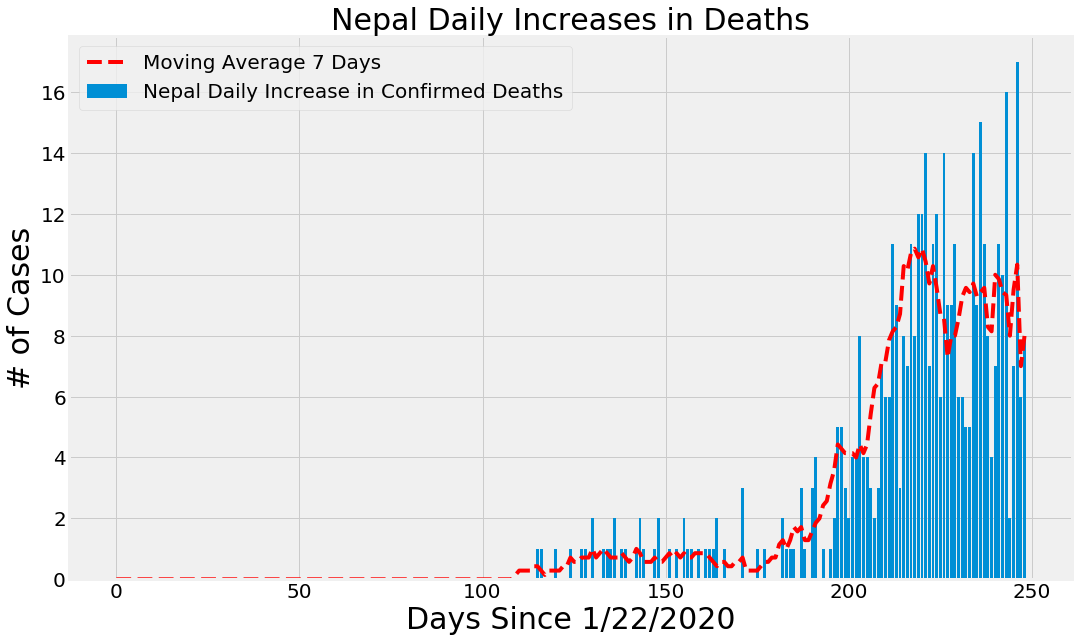

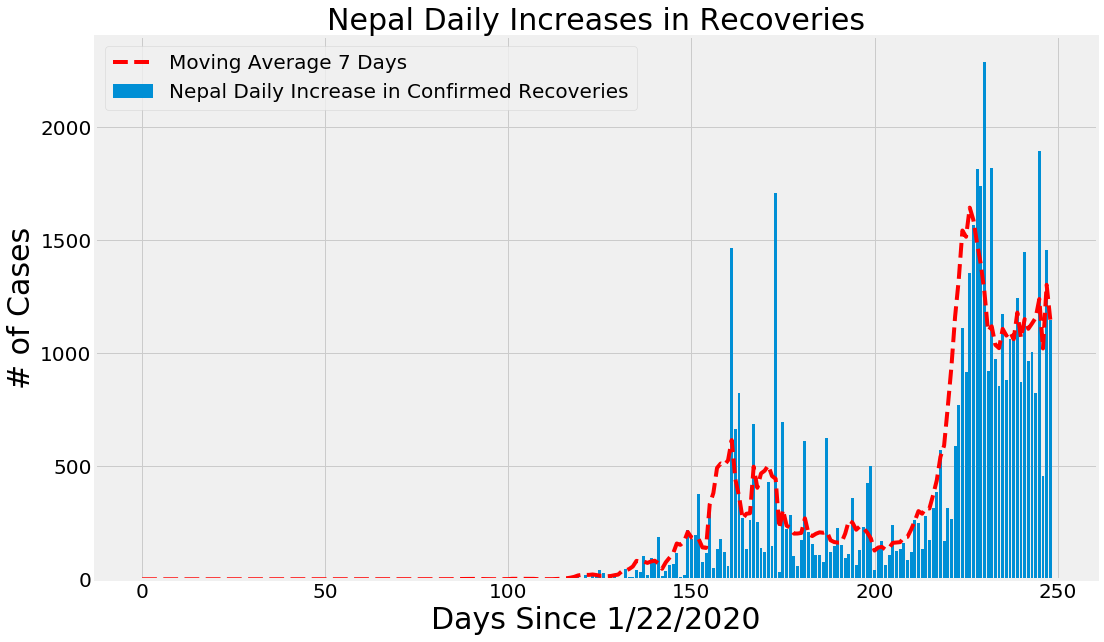

In [38]:
countries = ['US',  'India', 'Brazil',  'China', 'Nepal'] 

for country in countries:
    country_visualizations(country)

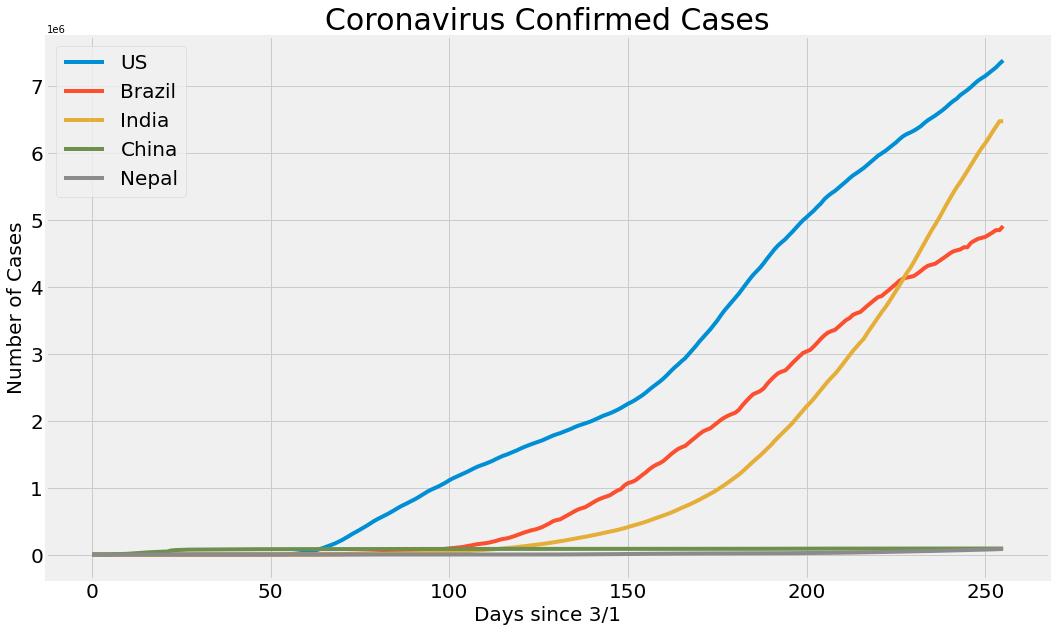

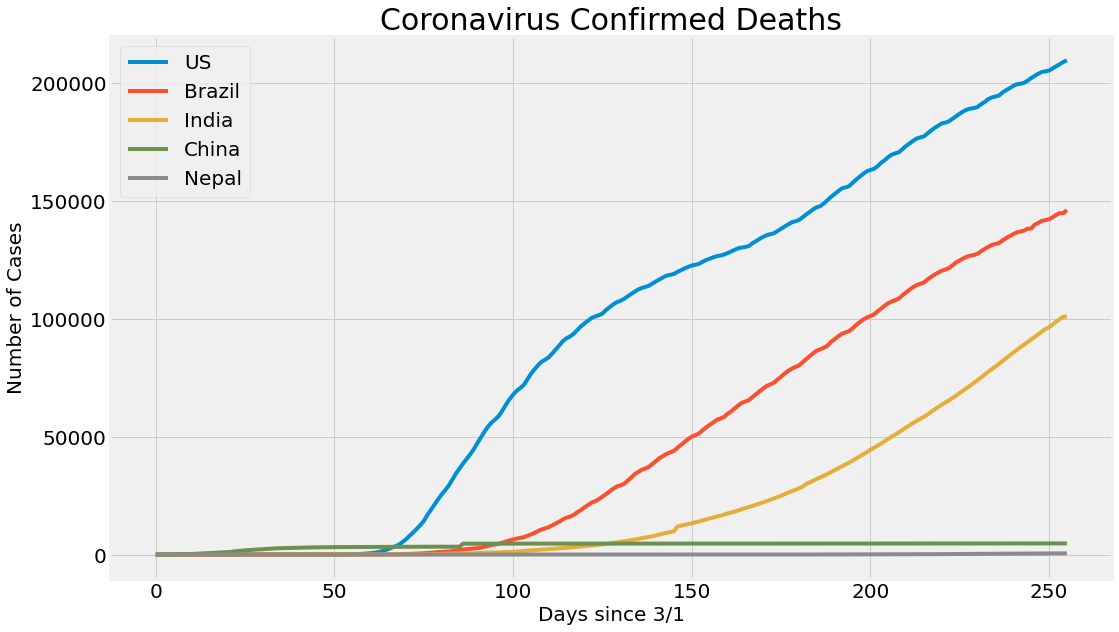

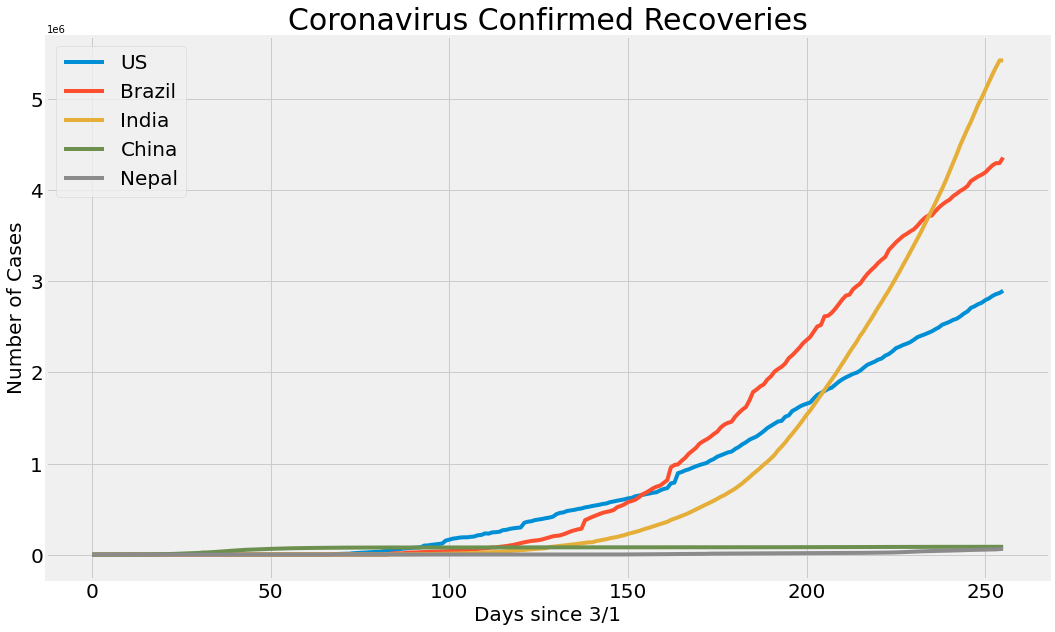

In [26]:
# Country Comparison
# removed redundant code

compare_countries = ['US', 'Brazil', 'India', 'China', 'Nepal'] 
graph_name = ['Coronavirus Confirmed Cases', 'Coronavirus Confirmed Deaths', 'Coronavirus Confirmed Recoveries']

for num in range(3):
    plt.figure(figsize=(16, 10))
    for country in compare_countries:
        plt.plot(get_country_info(country)[num])
    plt.legend(compare_countries, prop={'size': 20})
    plt.xlabel('Days since 3/1', size=20)
    plt.ylabel('Number of Cases', size=20)
    plt.title(graph_name[num], size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

# Predictions for confirmed coronavirus cases worldwide

In [27]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 10))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('Worldwide Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

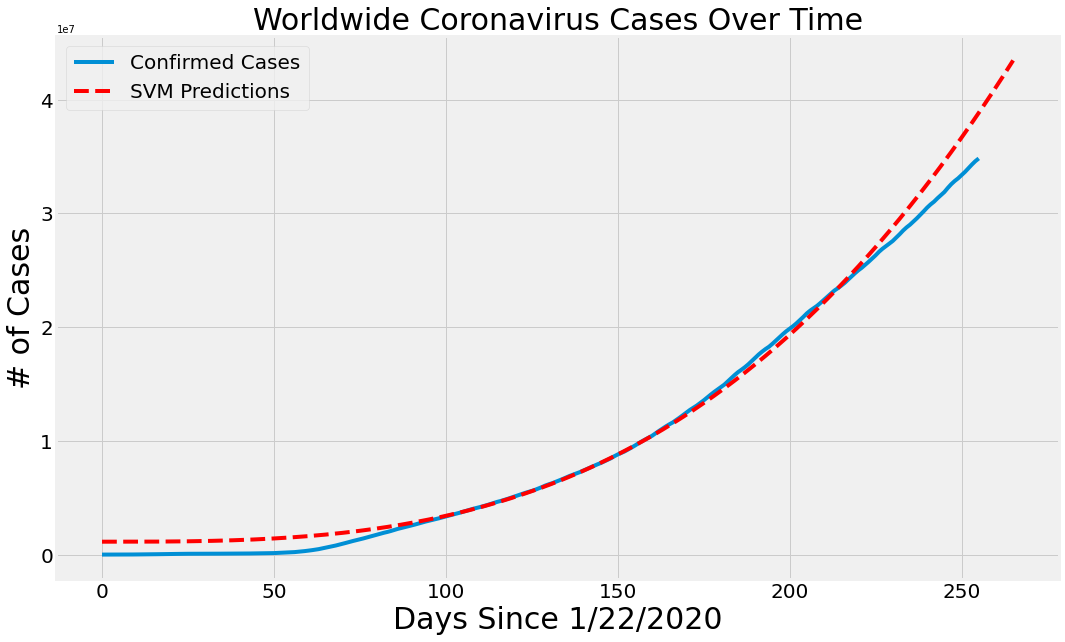

In [28]:
plot_predictions(adjusted_dates, world_cases, svm_pred, 'SVM Predictions', 'red')

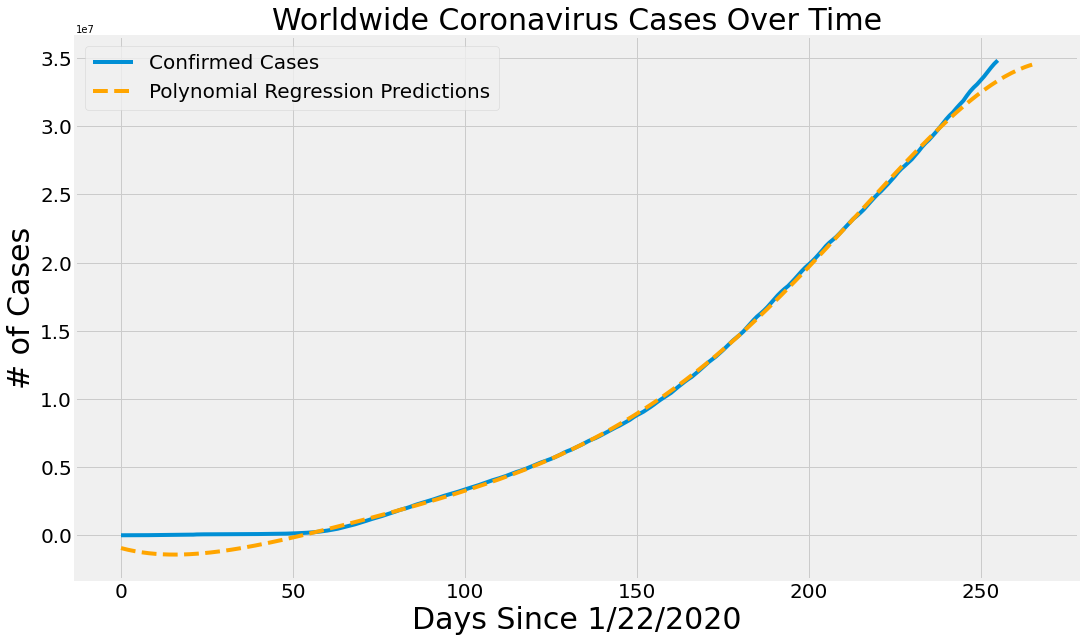

In [29]:
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Polynomial Regression Predictions', 'orange')

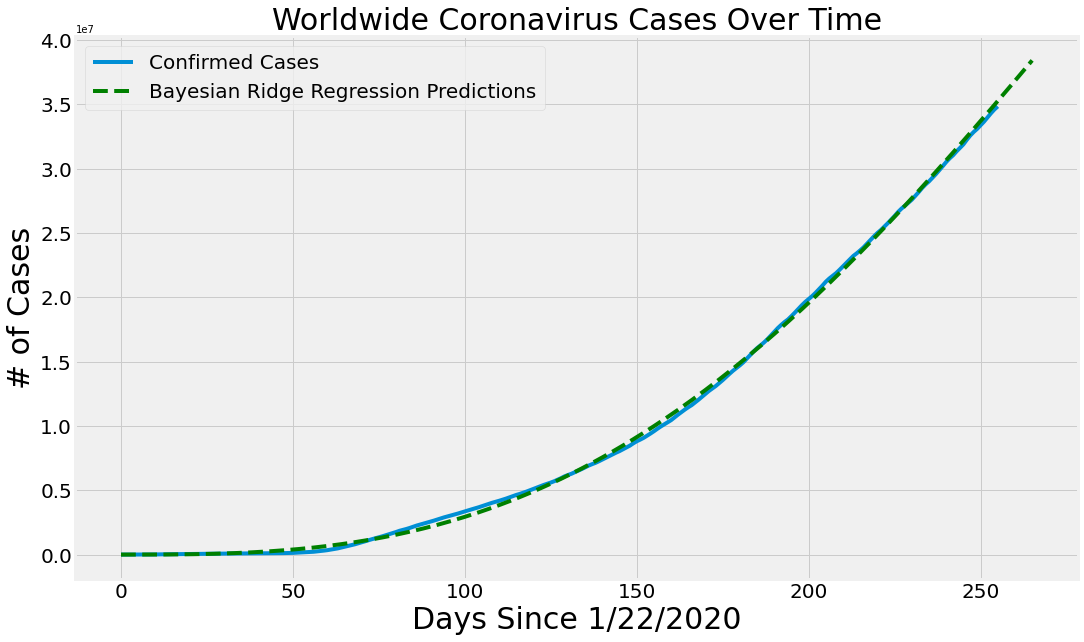

In [30]:
plot_predictions(adjusted_dates, world_cases, bayesian_pred, 'Bayesian Ridge Regression Predictions', 'green')


In [31]:
# Future predictions using SVM 
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'SVM Predicted # of Confirmed Cases Worldwide': np.round(svm_pred[-10:])})
svm_df.style.background_gradient(cmap='Greens')

,Date,SVM Predicted # of Confirmed Cases Worldwide
0,10/04/2020,39277641.000000
1,10/05/2020,39726388.000000
2,10/06/2020,40178640.000000
3,10/07/2020,40634412.000000
4,10/08/2020,41093716.000000
5,10/09/2020,41556568.000000
6,10/10/2020,42022980.000000
7,10/11/2020,42492966.000000
8,10/12/2020,42966539.000000
9,10/13/2020,43443714.000000


In [32]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
linear_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Polynomial Predicted # of Confirmed Cases Worldwide': np.round(linear_pred[-10:])})
linear_df.style.background_gradient(cmap='Reds')

,Date,Polynomial Predicted # of Confirmed Cases Worldwide
0,10/04/2020,33486124.000000
1,10/05/2020,33632617.000000
2,10/06/2020,33771719.000000
3,10/07/2020,33903176.000000
4,10/08/2020,34026726.000000
5,10/09/2020,34142103.000000
6,10/10/2020,34249040.000000
7,10/11/2020,34347262.000000
8,10/12/2020,34436492.000000
9,10/13/2020,34516447.000000


In [33]:
# Future predictions using Bayesian Ridge 
bayesian_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Bayesian Ridge Predicted # of Confirmed Cases Worldwide': np.round(bayesian_pred[-10:])})
bayesian_df.style.background_gradient(cmap='Oranges')

,Date,Bayesian Ridge Predicted # of Confirmed Cases Worldwide
0,10/04/2020,35559926.000000
1,10/05/2020,35873578.000000
2,10/06/2020,36187836.000000
3,10/07/2020,36502676.000000
4,10/08/2020,36818076.000000
5,10/09/2020,37134011.000000
6,10/10/2020,37450457.000000
7,10/11/2020,37767390.000000
8,10/12/2020,38084786.000000
9,10/13/2020,38402619.000000


# Changes of Mortality rate over time

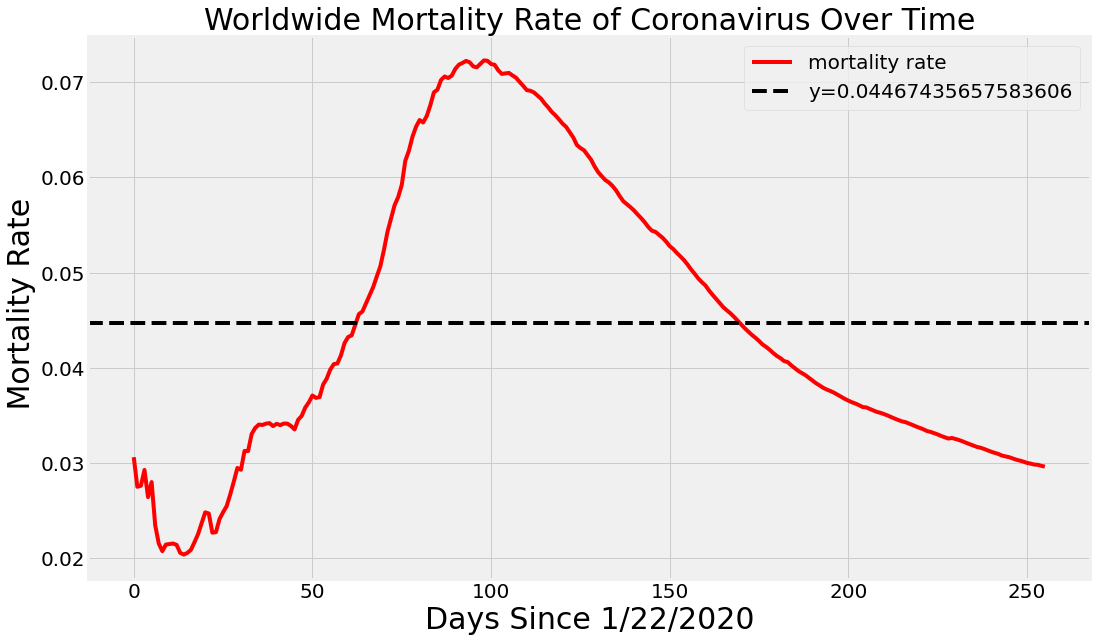

In [34]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, mortality_rate, color='red')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Worldwide Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel(' Mortality Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# Changes of Recovery rate over time

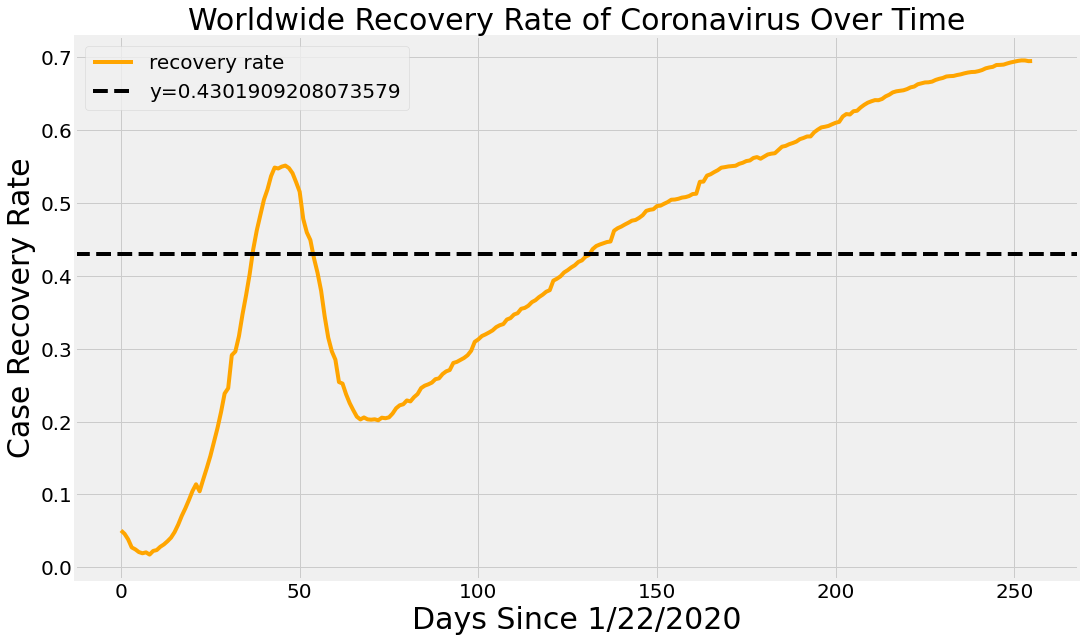

In [35]:
mean_recovery_rate = np.mean(recovery_rate)
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, recovery_rate, color='orange')
plt.axhline(y = mean_recovery_rate,linestyle='--', color='black')
plt.title('Worldwide Recovery Rate of Coronavirus Over Time', size=30)
plt.legend(['recovery rate', 'y='+str(mean_recovery_rate)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Case Recovery Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# Worldwide Death Vs Recoveries

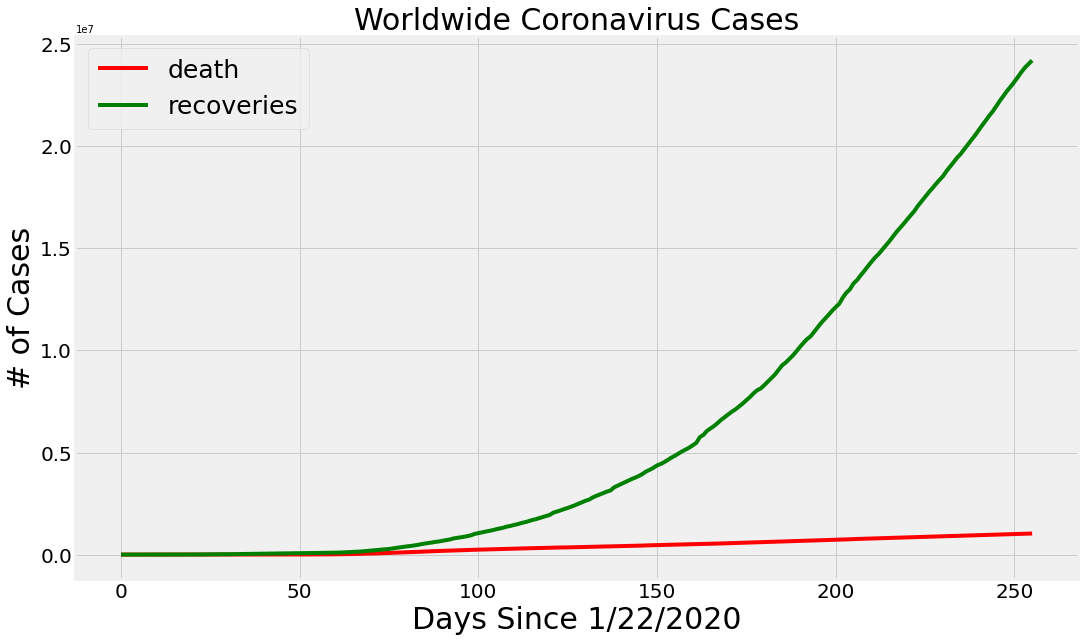

In [36]:
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=25)
plt.title('Worldwide Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# Getting information about countries/regions that have confirmed coronavirus cases

In [37]:
unique_countries =  list(latest_data['Country_Region'].unique())
country_confirmed_cases = []
country_death_cases = [] 
country_active_cases = []
country_recovery_cases = []
country_incidence_rate = [] 
country_mortality_rate = [] 

no_cases = []
for i in unique_countries:
    cases = latest_data[latest_data['Country_Region']==i]['Confirmed'].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
# sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    country_death_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
    country_recovery_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
    country_active_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Active'].sum())
    country_incidence_rate.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Incidence_Rate'].sum())
    country_mortality_rate.append(country_death_cases[i]/country_confirmed_cases[i])

In [38]:
country_df = pd.DataFrame({'Country Name': unique_countries, 'Number of Confirmed Cases': country_confirmed_cases,
                          'Number of Deaths': country_death_cases, 'Number of Recoveries' : country_recovery_cases, 
                          'Number of Active Cases' : country_active_cases, 'Incidence Rate' : country_incidence_rate,
                          'Mortality Rate': country_mortality_rate})
# number of cases per country/region

country_df.style.background_gradient(cmap='Oranges')

,Country Name,Number of Confirmed Cases,Number of Deaths,Number of Recoveries,Number of Active Cases,Incidence Rate,Mortality Rate
0,US,7078089,204490,2750459,4123140.000000,5916797.759082,0.028891
1,India,5992532,94503,4941627,956402.000000,20530.149264,0.015770
2,Brazil,4717991,141406,4153307,423278.000000,82411.684931,0.029972
3,Russia,1138509,20140,936881,181488.000000,66779.344406,0.017690
4,Colombia,806038,25296,700112,80630.000000,43868.043111,0.031383
5,Peru,794584,32037,657836,104711.000000,59453.566202,0.040319
6,Mexico,726431,76243,612361,37827.000000,18869.590748,0.104956
7,Spain,716481,31232,150376,534873.000000,27749.433287,0.043591
8,Argentina,702484,15543,556489,130452.000000,1554.313360,0.022126
9,South Africa,669498,16376,601818,51304.000000,1128.836263,0.024460


# US-States COVID-19 Cases

In [39]:
us_states = list(latest_data[latest_data['Country_Region']=='US']['Province_State'].unique())
state_confirmed_cases = []
state_death_cases = [] 
state_active = [] 
state_incidence_rate = [] 
state_mortality_rate = [] 

no_cases = [] 
for i in us_states:
    cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
    if cases > 0:
        state_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
# remove areas with no confirmed cases
for i in no_cases:
    us_states.remove(i)
    
us_states = [k for k, v in sorted(zip(us_states, state_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(us_states)):
    state_confirmed_cases[i] = latest_data[latest_data['Province_State']==us_states[i]]['Confirmed'].sum()
    state_death_cases.append(latest_data[latest_data['Province_State']==us_states[i]]['Deaths'].sum())
    state_active.append(latest_data[latest_data['Province_State']==us_states[i]]['Active'].sum())
    state_incidence_rate.append(latest_data[latest_data['Province_State']==us_states[i]]['Incidence_Rate'].sum())
    state_mortality_rate.append(state_death_cases[i]/state_confirmed_cases[i])
    
    # number of cases for us states

state_df = pd.DataFrame({'State Name': us_states, 'Number of Confirmed Cases': state_confirmed_cases,
                          'Number of Deaths': state_death_cases, 'Number of Active Cases' : state_active, 
                         'Incidence Rate' : state_incidence_rate, 'Mortality Rate': state_mortality_rate})
# number of cases per country/region

state_df.style.background_gradient(cmap='Oranges')

,State Name,Number of Confirmed Cases,Number of Deaths,Number of Active Cases,Incidence Rate,Mortality Rate
0,California,807451,15583,791868.000000,92683.584399,0.019299
1,Texas,754311,15707,738604.000000,546309.951979,0.020823
2,Florida,698682,14022,684660.000000,243602.962336,0.020069
3,New York,454760,33125,421635.000000,64630.584080,0.072841
4,Georgia,313873,6914,306959.000000,497941.992332,0.022028
5,Illinois,288773,8832,279941.000000,162198.361910,0.030585
6,Arizona,216826,5622,211204.000000,44974.757787,0.025929
7,North Carolina,206060,3440,202620.000000,194878.385087,0.016694
8,New Jersey,202850,16103,186747.000000,42559.163569,0.079384
9,Tennessee,190891,2374,188517.000000,276089.701942,0.012436


### Apple Mobility data analysis

In [40]:
def get_mobility_by_state(transport_type, state, day):
    return apple_mobility[apple_mobility['sub-region']==state][apple_mobility['transportation_type']==transport_type].sum()[day]

In [41]:
apple_mobility.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-09-16,2020-09-17,2020-09-18,2020-09-19,2020-09-20,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,135.62,140.86,151.82,164.99,160.00,126.60,128.29,122.76,118.41,122.77
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,160.34,161.07,165.59,157.44,141.41,158.68,149.81,146.82,138.76,148.06
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,61.09,66.01,76.20,75.11,46.99,59.23,60.17,62.01,62.72,68.81
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,50.38,56.07,62.88,58.01,41.11,50.83,50.00,53.50,53.18,51.42
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,95.04,101.92,102.84,82.47,89.67,91.87,93.99,95.72,102.71,102.03


In [42]:
# sample testing 
get_mobility_by_state('walking', 'Washington', '2020-07-30')

2242.8999999999996

In [43]:
# revising date to fit with the mobility format 
revised_dates = []
for i in range(len(dates)):
    revised_dates.append(datetime.datetime.strptime(dates[i], '%m/%d/%y').strftime('%Y-%m-%d'))
    # returns true if it is a weekend, and false if it is a weekday 
def weekday_or_weekend(date):
    date_obj = datetime.datetime.strptime(date, '%Y-%m-%d')
    day_of_the_week =  date_obj.weekday()
    if (day_of_the_week+1) % 6 == 0 or (day_of_the_week+1) % 7 == 0:
        return True 
    else:
        return False 
    
    revised_day_since_1_22 = [i for i in range(len(revised_dates))]

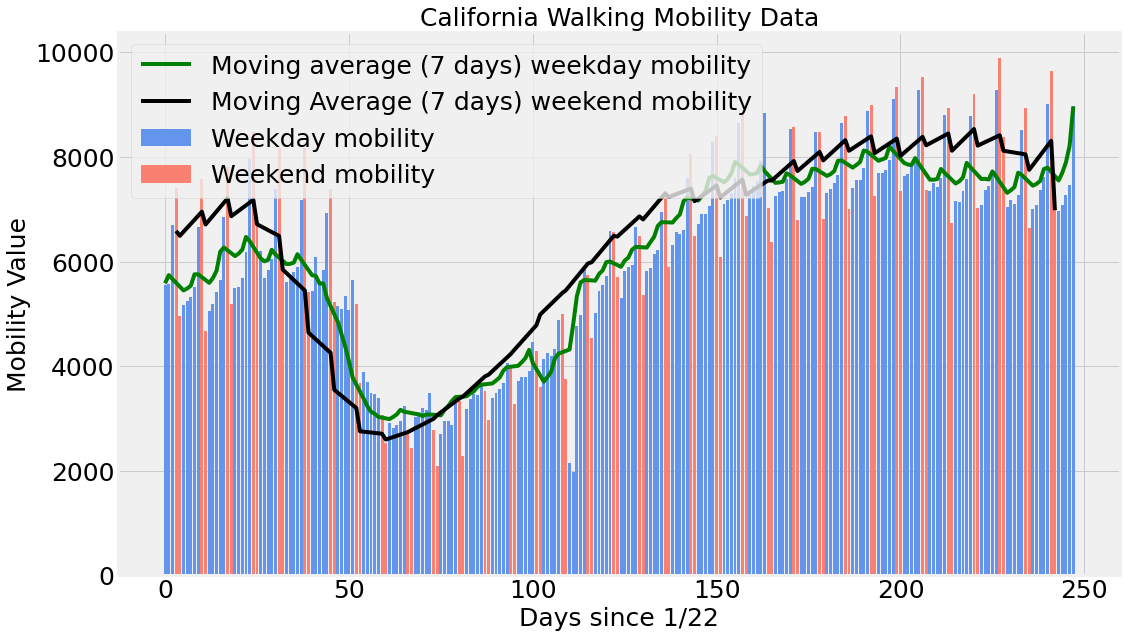

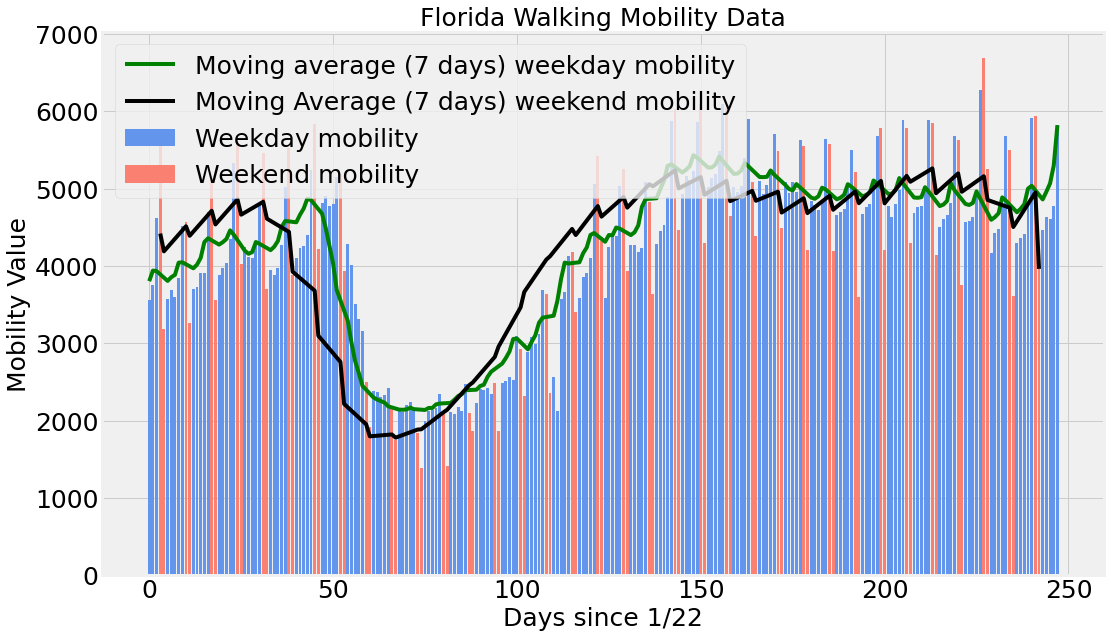

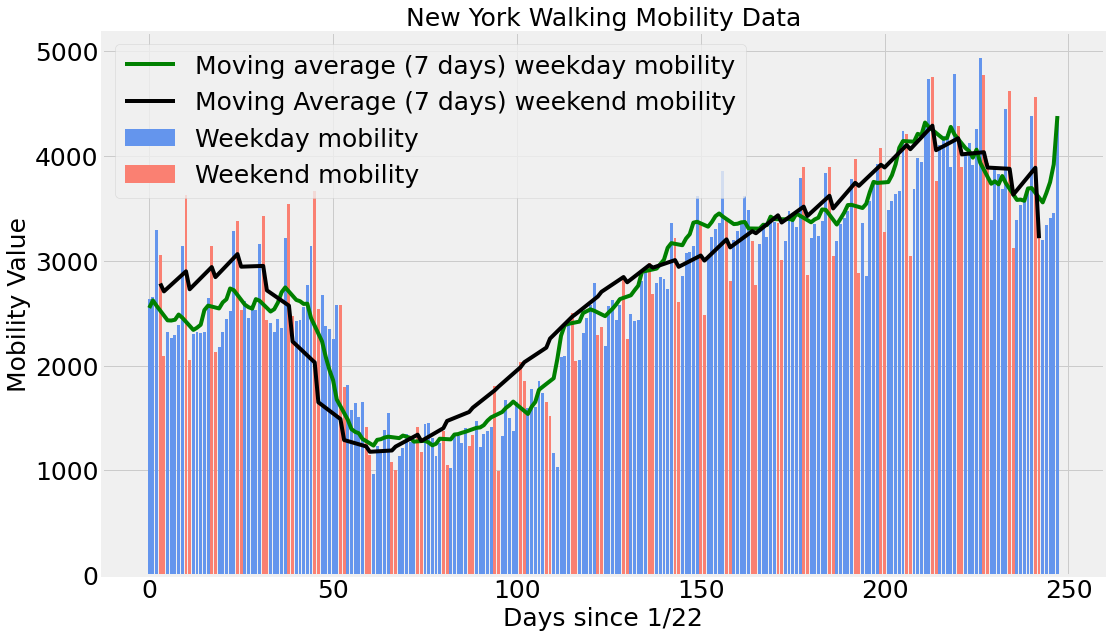

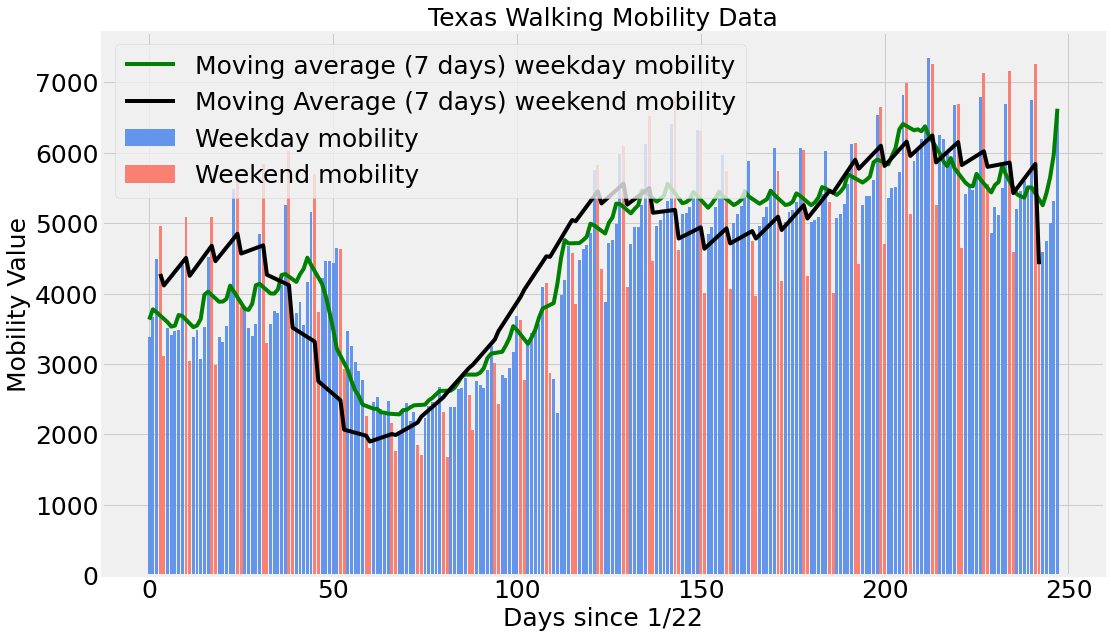

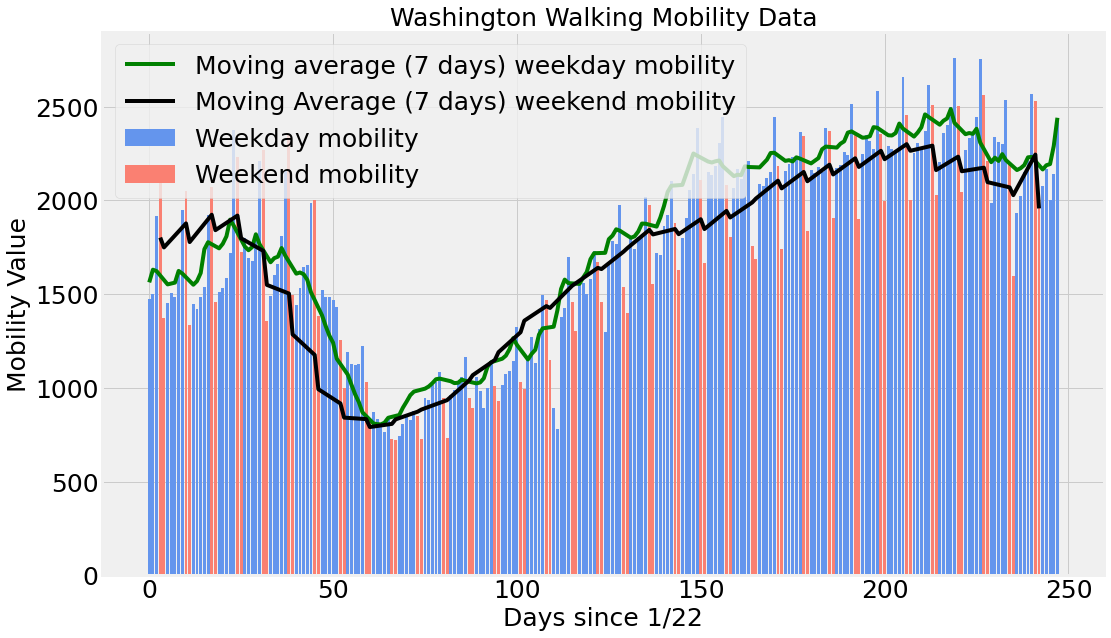

In [44]:
import matplotlib.dates as mdates
states = ['New York', 'Florida', 'California', 'Texas', 'Washington']
states.sort()
# making sure the dates are in sync 
mobility_latest_date = apple_mobility.columns[-1]
mobility_latest_index = revised_dates.index(mobility_latest_date)
for state in states:
    # weekend and weekday mobility are separated 
    weekday_mobility = []
    weekday_mobility_dates = [] 
    weekend_mobility = [] 
    weekend_mobility_dates = [] 
    
    for i in range(len(revised_dates)):
        if i <= mobility_latest_index:
            if weekday_or_weekend(revised_dates[i]):
                weekend_mobility.append(get_mobility_by_state('walking', state, revised_dates[i]))
                weekend_mobility_dates.append(i)
            else:
                weekday_mobility.append(get_mobility_by_state('walking', state, revised_dates[i]))
                weekday_mobility_dates.append(i)
        else:
            pass
        
    # remove null values (they are counted as 0)
    for i in range(len(weekend_mobility)):       
        if weekend_mobility[i] == 0 and i != 0:
            weekend_mobility[i] = weekend_mobility[i-1]
        elif weekend_mobility[i] == 0 and i == 0:
            weekend_mobility[i] = weekend_mobility[i+1]
        else:
            pass
        
    for i in range(len(weekday_mobility)):       
        if weekday_mobility[i] == 0 and i != 0:
            weekday_mobility[i] = weekday_mobility[i-1]
        elif weekday_mobility[i] == 0 and i == 0:
            weekday_mobility[i] = weekday_mobility[i+1]
        else:
            pass
    
    
    weekday_mobility_average = moving_average(weekday_mobility, 7)
    weekend_mobility_average = moving_average(weekend_mobility, 7)
    
    plt.figure(figsize=(16, 10))
    plt.bar(weekday_mobility_dates, weekday_mobility, color='cornflowerblue')
    plt.plot(weekday_mobility_dates, weekday_mobility_average, color='green')
    
    plt.bar(weekend_mobility_dates, weekend_mobility, color='salmon')
    plt.plot(weekend_mobility_dates, weekend_mobility_average, color='black')
    
    plt.legend(['Moving average (7 days) weekday mobility', 'Moving Average (7 days) weekend mobility', 'Weekday mobility', 'Weekend mobility'], prop={'size': 25})
    plt.title('{} Walking Mobility Data'.format(state), size=25)
    plt.xlabel('Days since 1/22', size=25)
    plt.ylabel('Mobility Value', size=25)
    plt.xticks(size=25)
    plt.yticks(size=25)
    plt.show()